In [7]:
from boto.s3.connection import S3Connection
import os
import json
import boto.s3
import sys
import datetime
import seaborn as sns
from boto.s3.key import Key
from pprint import pprint
import pandas as pd
import urllib
import csv
import io
import requests
import time
import json
import datetime
from pprint import pprint
import scipy
import numpy as np
import matplotlib.pyplot as plt

# 1.insert train_2016 data

rawdataspecificrows= pd.read_csv("train_2016_v2.csv")
rawdataspecificrows.shape        
rawdataspecificrows.head(2)

In [9]:
rawdataspecificrows.head(2)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01


# 2. analysis the train_2016 by using graph

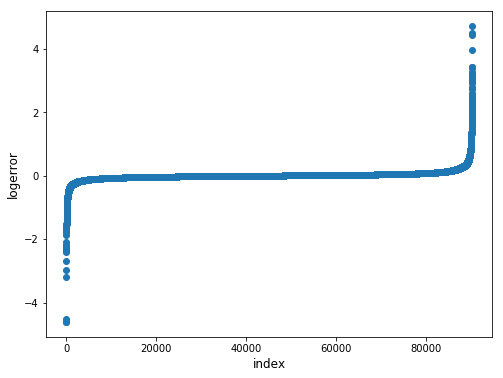

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(rawdataspecificrows.shape[0]), np.sort(rawdataspecificrows.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

# 3.show number of loggererror in every day

In [11]:
color = sns.color_palette()
rawdataspecificrows['transaction_month'] = rawdataspecificrows['transactiondate']

cnt_srs = rawdataspecificrows['transaction_month'].value_counts()
plt.figure(figsize=(365,100))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Days of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [12]:
(rawdataspecificrows['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

# insert the data of properties_2016

In [13]:
prop_df = pd.read_csv("properties_2016.csv")
prop_df.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [14]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


# show how much null value in each column

In [15]:
prop_df.isnull().sum()

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


# analyis location by using graph

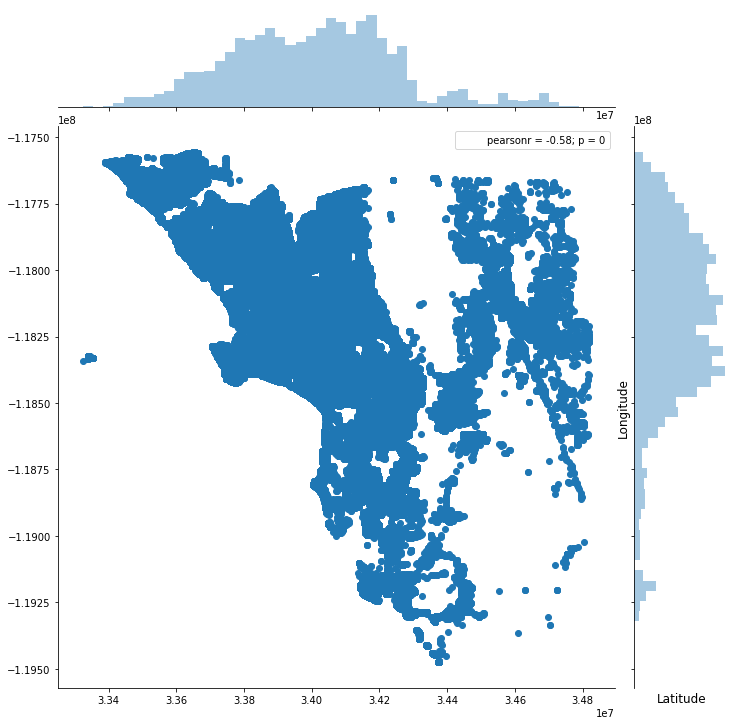

In [16]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

# merge data with two table on 'parcelid'

train_df = pd.merge(rawdataspecificrows, prop_df, on='parcelid', how='left')
train_df.head()

In [20]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,object
3,transaction_month,object
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [23]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,object,7


In [24]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.99]

    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,column_name,missing_count,missing_ratio
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
12,decktypeid,89617,0.992711
16,finishedsquarefeet13,90242,0.999634
19,finishedsquarefeet6,89854,0.995336
44,storytypeid,90232,0.999524
46,typeconstructiontypeid,89976,0.996688
49,yardbuildingsqft26,90180,0.998948
52,fireplaceflag,90053,0.997541


# drop the useless columns

In [89]:
#train_df.drop(['fireplaceflag','basementsqft','buildingclasstypeid','decktypeid','finishedsquarefeet13','yardbuildingsqft26','typeconstructiontypeid','storytypeid','finishedsquarefeet6'],axis=1,inplace=True)
#train_df.drop(['taxdelinquencyflag','propertyzoningdesc','propertycountylandusecode','hashottuborspa','transactiondate','transaction_month'],axis=1,inplace=True)
#train_df.drop(['architecturalstyletypeid'],axis=1,inplace=True)
train_df.head()
train_df.to_csv('values.csv',mode='a',encoding='utf-8',index=False)
train_df.head()


,parcelid,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,1.000000,2.0,3.0,4.000000,2.0,1347.974037,1684.0,1684.0,...,310.142101,1959.0,1.440739,122754.0,360170.0,2015.0,237416.0,6735.88,13.402692,6.037107e+13
1,14366692,-0.1684,1.816372,3.5,4.0,5.565407,3.5,1347.974037,2263.0,2263.0,...,310.142101,2014.0,1.440739,346458.0,585529.0,2015.0,239071.0,10153.02,13.402692,6.049151e+13
2,12098116,-0.0040,1.000000,3.0,2.0,4.000000,3.0,1347.974037,2217.0,2217.0,...,310.142101,1940.0,1.440739,61994.0,119906.0,2015.0,57912.0,11484.48,13.402692,6.037464e+13
3,12643413,0.0218,1.000000,2.0,2.0,4.000000,2.0,1347.974037,839.0,839.0,...,310.142101,1987.0,1.440739,171518.0,244880.0,2015.0,73362.0,3048.74,13.402692,6.037296e+13
4,14432541,-0.0050,1.816372,2.5,4.0,5.565407,2.5,1347.974037,2283.0,2283.0,...,310.142101,1981.0,2.000000,169574.0,434551.0,2015.0,264977.0,5488.96,13.402692,6.059042e+13


# analysis data 

In [30]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,airconditioningtypeid,float64
3,bathroomcnt,float64
4,bedroomcnt,float64
5,buildingqualitytypeid,float64
6,calculatedbathnbr,float64
7,finishedfloor1squarefeet,float64
8,calculatedfinishedsquarefeet,float64
9,finishedsquarefeet12,float64


# find which element might effect the result

In [31]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,44


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


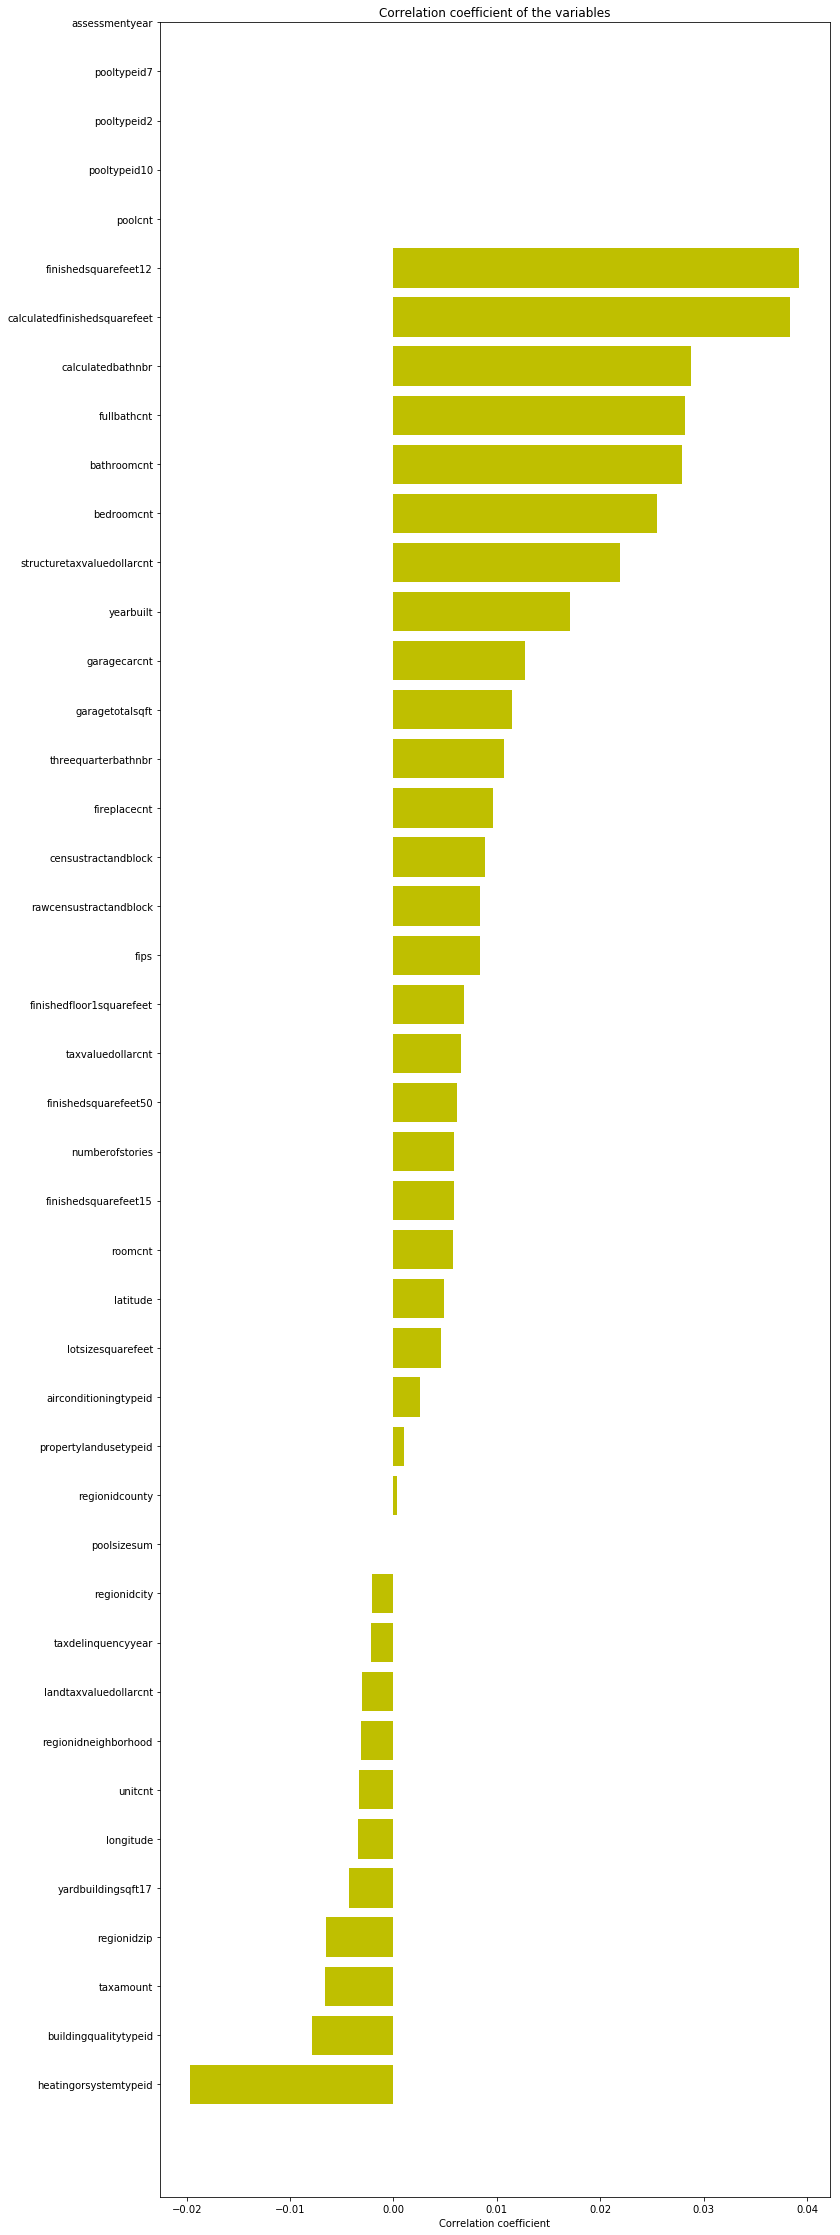

In [32]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values, inplace=True)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [33]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,col_labels,corr_values
15,heatingorsystemtypeid,-0.019648
36,structuretaxvaluedollarcnt,0.021935
2,bedroomcnt,0.025467
1,bathroomcnt,0.027889
12,fullbathcnt,0.028169
4,calculatedbathnbr,0.028758
6,calculatedfinishedsquarefeet,0.038341
7,finishedsquarefeet12,0.039248


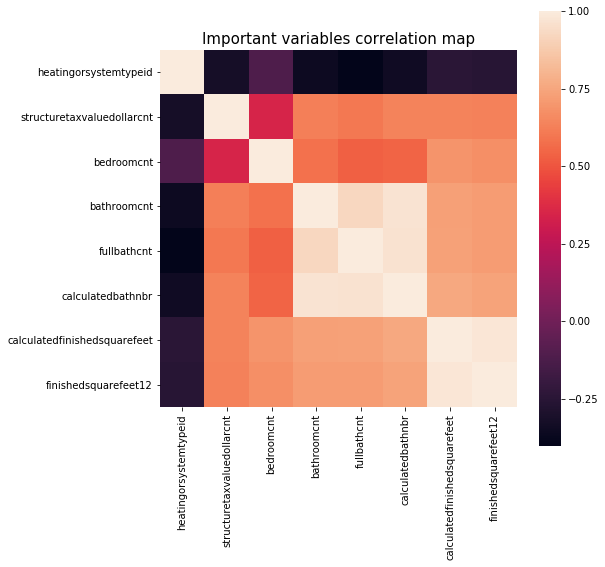

In [34]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [35]:
corr_df_sel.to_csv('influence_values.csv',mode='a',encoding='utf-8',index=False)

In [96]:
train_df.to_csv('midterm_2016.csv',mode='a',encoding='utf-8',index=False)

In [92]:
#rawdata.to_csv('wrangleddata.csv', index=False)
import boto3
from botocore.client import Config
from boto.s3.connection import S3Connection

s3 = boto3.resource('s3')
for bucket in s3.buckets.all():
    print(bucket.name)

with open('s3.json') as data_file:    
    data = json.load(data_file)
# secret keys 

AWSAccess1=data["AWSAccess"]
AWSSecret1=data["AWSSecret"]
    
#Connection variables

c = boto.connect_s3(AWSAccess1, AWSSecret1)
conn = S3Connection(AWSAccess1, AWSSecret1)    
bucket = c.get_bucket('zillowdata')
b = c.get_bucket(bucket, validate=False)
 

#
BUCKET_NAME ='zillowdata'
FILE_NAME='midterm_2017.csv'
data = open(FILE_NAME, 'rb')

s3.Bucket(BUCKET_NAME).put_object(Key=FILE_NAME, Body=data,ACL='public-read')


print('successfully uploaded to s3')

pleasepass
pleasepassokkk
zhaomengqi8000
zillowdata
successfully uploaded to s3


In [91]:
rawdataspecificrows= pd.read_csv("midterm_2016.csv")
rawdataspecificrows.head(5)

,parcelid,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,1.000000,2.0,3.0,4.000000,2.0,1347.974037,1684.0,1684.0,...,310.142101,1959.0,1.440739,122754.0,360170.0,2015.0,237416.0,6735.88,13.402692,6.037107e+13
1,14366692,-0.1684,1.816372,3.5,4.0,5.565407,3.5,1347.974037,2263.0,2263.0,...,310.142101,2014.0,1.440739,346458.0,585529.0,2015.0,239071.0,10153.02,13.402692,6.049151e+13
2,12098116,-0.0040,1.000000,3.0,2.0,4.000000,3.0,1347.974037,2217.0,2217.0,...,310.142101,1940.0,1.440739,61994.0,119906.0,2015.0,57912.0,11484.48,13.402692,6.037464e+13
3,12643413,0.0218,1.000000,2.0,2.0,4.000000,2.0,1347.974037,839.0,839.0,...,310.142101,1987.0,1.440739,171518.0,244880.0,2015.0,73362.0,3048.74,13.402692,6.037296e+13
4,14432541,-0.0050,1.816372,2.5,4.0,5.565407,2.5,1347.974037,2283.0,2283.0,...,310.142101,1981.0,2.000000,169574.0,434551.0,2015.0,264977.0,5488.96,13.402692,6.059042e+13


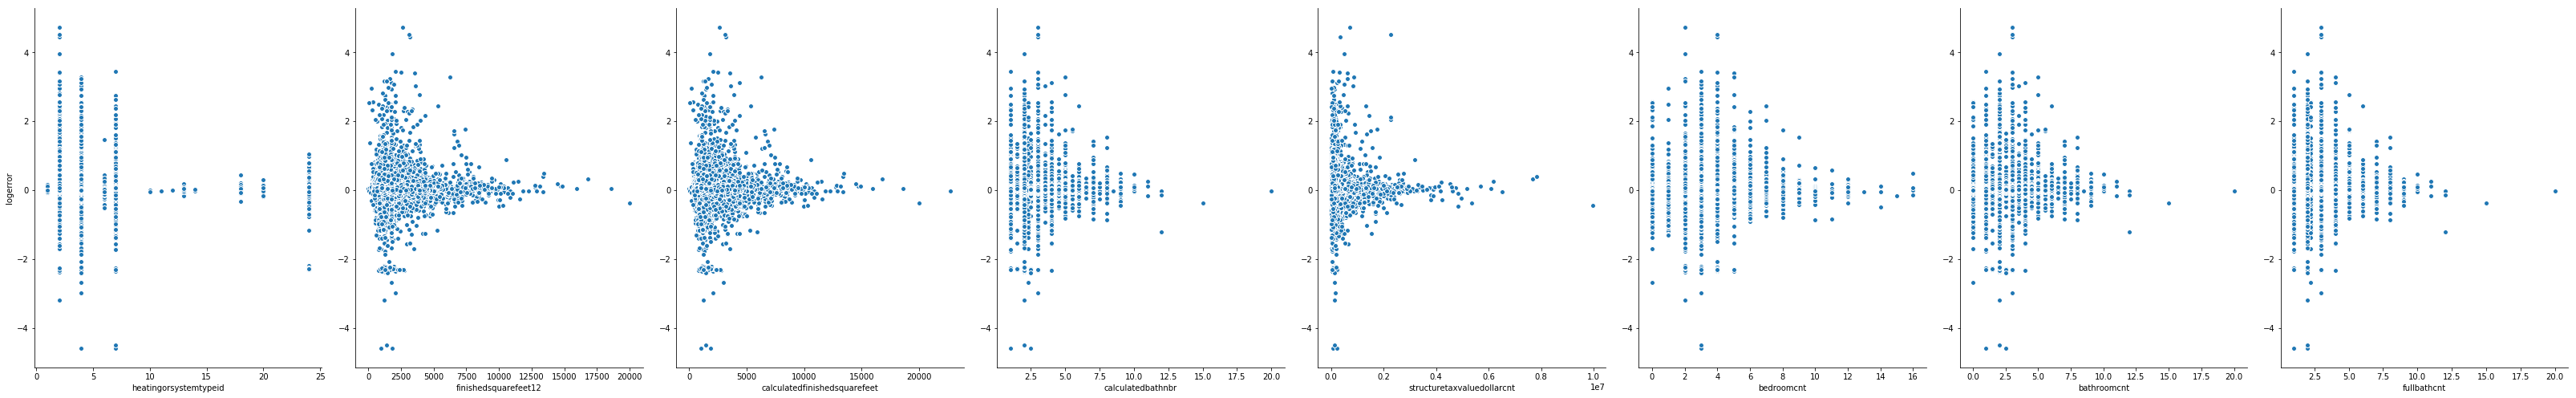

In [41]:
# visualize the relationship between the features and the response using scatterplots  
sns.pairplot(rawdataspecificrows, x_vars=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt'], y_vars='logerror', size=7, aspect=0.8)  
plt.show()

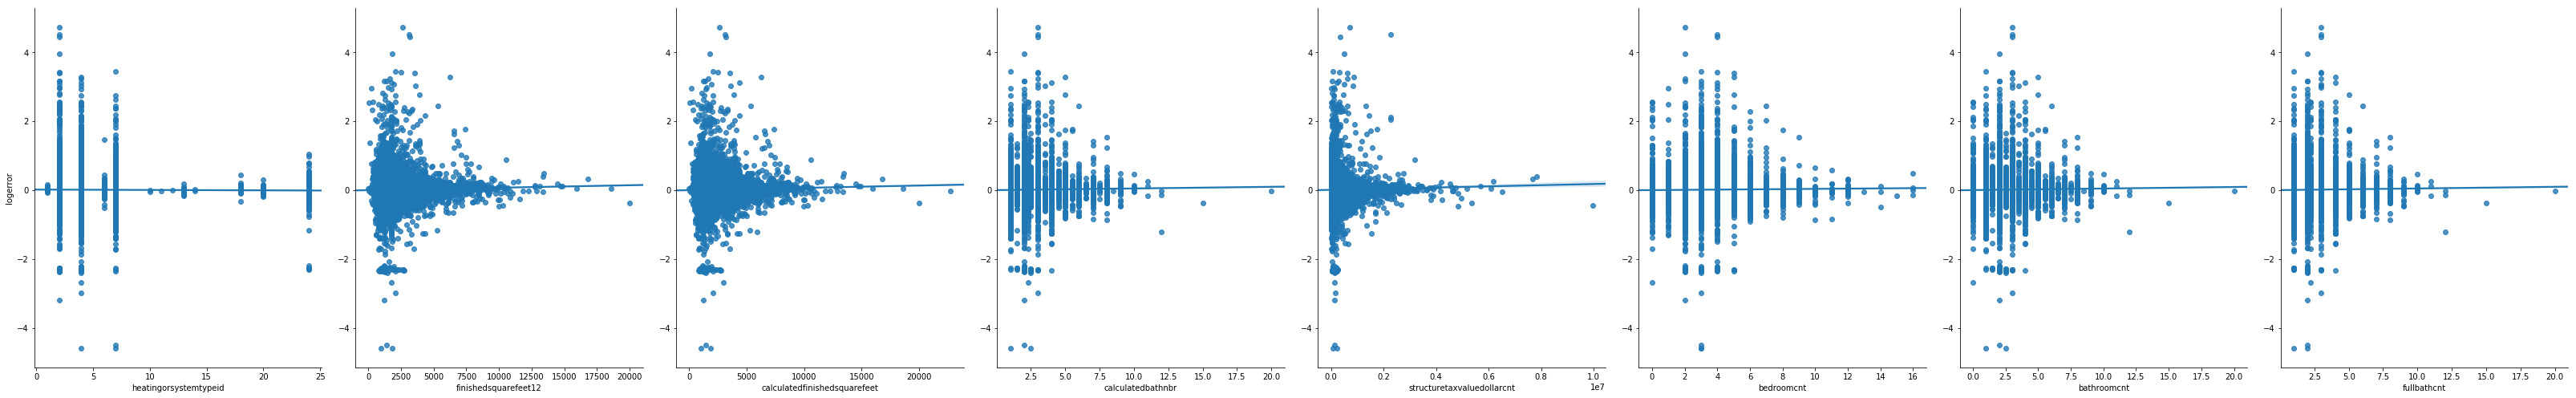

In [38]:
# visualize the relationship between the features and the response using scatterplots  
sns.pairplot(rawdataspecificrows, x_vars=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt'], y_vars='logerror', size=7, aspect=0.8, kind='reg')  
plt.show()

In [42]:
feature_cols=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)

,heatingorsystemtypeid,finishedsquarefeet12,calculatedfinishedsquarefeet,calculatedbathnbr,structuretaxvaluedollarcnt,bedroomcnt,bathroomcnt,fullbathcnt
0,2.000000,1684.0,1684.0,2.0,122754.0,3.0,2.0,2.0
1,3.926979,2263.0,2263.0,3.5,346458.0,4.0,3.5,3.0
2,2.000000,2217.0,2217.0,3.0,61994.0,2.0,3.0,3.0
3,2.000000,839.0,839.0,2.0,171518.0,2.0,2.0,2.0
4,3.926979,2283.0,2283.0,2.5,169574.0,4.0,2.5,2.0


# split the data into train and test dataset

In [43]:
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 8)
(67706,)
(22569, 8)
(22569,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.39747093e-04   2.67350438e-06   5.14741221e-06  -3.37058489e-03
   1.58712522e-10   5.47664113e-04   2.33778519e-04   1.64990211e-03]
0.00273201629783


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [45]:
zip(feature_cols,linreg.coef_)

In [46]:
Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))


[ 0.02001145  0.01799294  0.02732893 ...,  0.0094094   0.00834821
  0.01109462]
<class 'numpy.ndarray'>


# Get RMSE and MAE value

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.2353815736


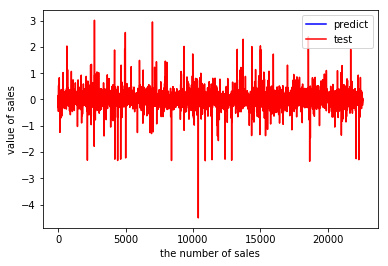

In [47]:
# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()



In [48]:
#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

6.67315435027
0.0231904247569
0.0320428477077


# 1.cancel heatingorsystemtypeid

In [50]:
feature_cols=['finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)

,finishedsquarefeet12,calculatedfinishedsquarefeet,calculatedbathnbr,structuretaxvaluedollarcnt,bedroomcnt,bathroomcnt,fullbathcnt
0,1684.0,1684.0,2.0,122754.0,3.0,2.0,2.0
1,2263.0,2263.0,3.5,346458.0,4.0,3.5,3.0
2,2217.0,2217.0,3.0,61994.0,2.0,3.0,3.0
3,839.0,839.0,2.0,171518.0,2.0,2.0,2.0
4,2283.0,2283.0,2.5,169574.0,4.0,2.5,2.0


In [51]:
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 7)
(67706,)
(22569, 7)
(22569,)


In [52]:
from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  3.16812017e-06   4.65798217e-06  -4.10389864e-03   1.45423377e-10
   5.04232540e-04   2.39090783e-04   2.97421382e-03]
-0.000927957728667


In [53]:
Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

[ 0.01985176  0.01728118  0.0265791  ...,  0.01129592  0.00790415
  0.00978175]
<class 'numpy.ndarray'>


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23534651548


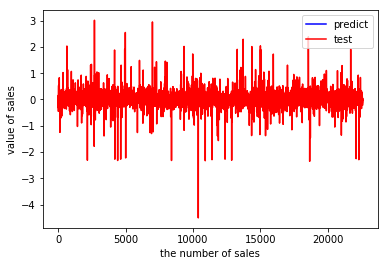

6.67339787519
0.0231899221836
0.0320751677121


In [93]:
# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

In [ ]:
#2.继续取消finishedsquarefeet12
feature_cols=['heatingorsystemtypeid','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)

In [56]:
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 7)
(67706,)
(22569, 7)
(22569,)


In [57]:
from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.55348363e-04   7.54472593e-06  -3.52446426e-03   1.06317601e-09
   4.42288293e-04   6.77035729e-04   1.33511160e-03]
0.00341797137823


In [58]:
Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

[ 0.01972987  0.01775895  0.02671038 ...,  0.00933712  0.00849683
  0.01113042]
<class 'numpy.ndarray'>


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23503083134


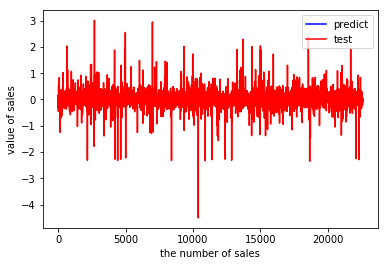

6.67192752436
0.0231853969598
0.032009358968


In [79]:
# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 7)
(67706,)
(22569, 7)
(22569,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.12755113e-04   6.86507706e-06  -1.73498053e-03   1.09075283e-09
   1.05936226e-03  -1.09164075e-03   1.88125080e-03]
0.00144104972099
[ 0.02065198  0.01774554  0.02655174 ...,  0.0095656   0.00873053
  0.01127639]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23508651533


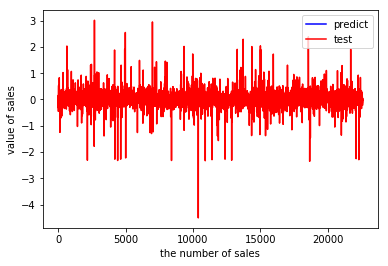

6.67488976708
0.0231861951386
0.0320735204263


In [80]:
#3.继续取消calculatedfinishedsquarefeet
feature_cols=['heatingorsystemtypeid','finishedsquarefeet12','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 7)
(67706,)
(22569, 7)
(22569,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.48708614e-04   2.73312278e-06   4.78498061e-06   2.23681771e-10
   6.86531155e-04  -8.71717314e-04  -4.92825420e-04]
0.00241174896268
[ 0.01988343  0.01770355  0.02684058 ...,  0.00921669  0.00937024
  0.01100349]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23533263611


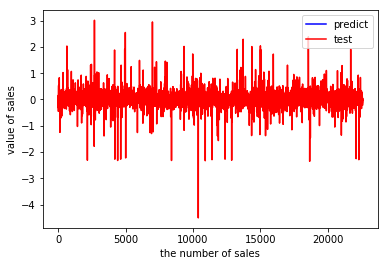

6.67387817606
0.0231897232183
0.0321027641711


In [81]:
#4.继续取消calculatedbathnbr
feature_cols=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 7)
(67706,)
(22569, 7)
(22569,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.39739142e-04   2.69066079e-06   5.15752376e-06  -3.37376574e-03
   5.40240867e-04   2.44073399e-04   1.64898434e-03]
0.00272108373709
[ 0.02000782  0.01801307  0.02736682 ...,  0.00940437  0.0083457
  0.01108837]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23536411131


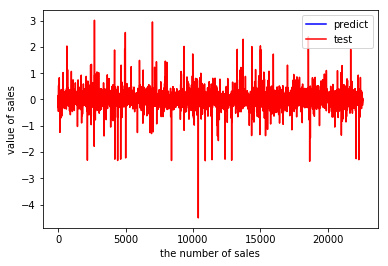

6.67310580118
0.0231901744267
0.0320417888267


In [82]:
#5.继续取消structuretaxvaluedollarcnt
feature_cols=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','bedroomcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 7)
(67706,)
(22569, 7)
(22569,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.36876074e-04   2.45266354e-06   5.76075060e-06  -4.12175396e-03
  -6.61444424e-10   1.02690721e-03   1.79511015e-03]
0.00342854064584
[ 0.02005053  0.01841484  0.02761584 ...,  0.00933943  0.00823834
  0.01095561]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23536153817


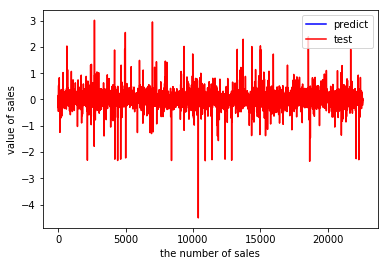

6.67147722399
0.0231901375397
0.0320238171064


In [83]:
#6.继续取消bedroomcnt
feature_cols=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bathroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 7)
(67706,)
(22569, 7)
(22569,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.39760843e-04   2.70987882e-06   5.08520487e-06  -3.13643299e-03
   2.03250085e-10   5.78720127e-04   1.64358703e-03]
0.00268294367334
[ 0.02000766  0.01796451  0.02730408 ...,  0.00940814  0.00835084
  0.01109727]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23538119181


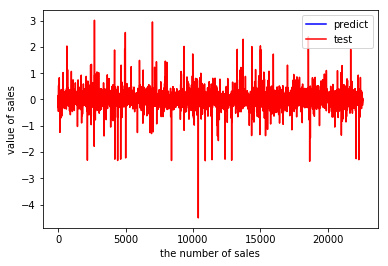

6.67327592414
0.0231904192837
0.032039429145


In [84]:
#7.继续取消bathroomcnt
feature_cols=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','fullbathcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 7)
(67706,)
(22569, 7)
(22569,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -6.52110056e-04   2.58033741e-06   5.18657335e-06  -1.73374050e-03
   1.44392599e-10   5.68170663e-04   2.11002451e-04]
0.00278415111702
[ 0.019818    0.01783797  0.02713333 ...,  0.00927631  0.00907056
  0.01103414]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23534651548


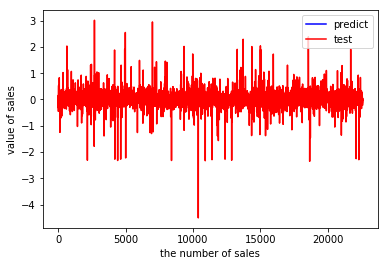

6.67339787519
0.0231899221836
0.0320751677121


In [85]:
#8.继续取消fullbathcnt
feature_cols=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt']
X = rawdataspecificrows[feature_cols] 
X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
Name: logerror, dtype: float64
(67706, 2)
(67706,)
(22569, 2)
(22569,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -5.99574675e-04   6.97838732e-06]
0.0023225067142
[ 0.02097687  0.01836695  0.02620368 ...,  0.00924205  0.00978658
  0.0108931 ]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
22569 22569
(22569,) (22569,)
RMSE by hand: 3.23503083134


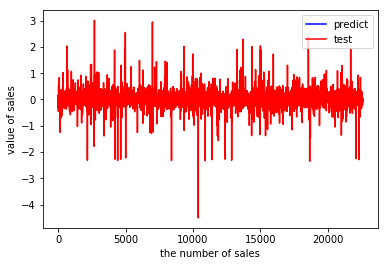

6.67192752436
0.0231853969598
0.032009358968


In [78]:
#结论:需要取消calculatedfinishedsquarefeet，calculatedbathnbr，structuretaxvaluedollarcnt，bedroomcnt，bathroomcnt，fullbathcnt
feature_cols=['heatingorsystemtypeid','finishedsquarefeet12']
X = rawdataspecificrows[feature_cols] 
X.head(5)
Y = rawdataspecificrows.logerror
print(Y.head(5))

from sklearn.cross_validation import train_test_split  
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)  
print (X_train.shape)  
print (Y_train.shape)  
print (X_test.shape)  
print (Y_test.shape)

from sklearn.linear_model import LinearRegression   
linreg = LinearRegression()  
model=linreg.fit(X_train, Y_train) 
print(model)
print(linreg.coef_)
print(linreg.intercept_)

Y_pred = linreg.predict(X_test)  
print(Y_pred) 
print (type(Y_pred))

# use RMES
print (type(Y_pred),type(Y_test)) 
print (len(Y_pred),len(Y_test))  
print (Y_pred.shape,Y_test.shape)  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(Y_pred)):  
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro)

# make ROC graph
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")  
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()

#R-squared score of this model
train_pred=linreg.predict(X_train)  
from sklearn.metrics import*
r2_score(Y_train,train_pred)
test_pred=linreg.predict(X_test)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,test_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,test_pred))
#Median absolute error
print(median_absolute_error(Y_test,test_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


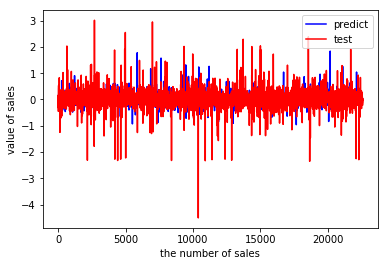

RMSE by hand: 3.60992771638
8.55672317984
0.0288705262029
0.04637


In [67]:
#Use Random Forest 

#test 8 features

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


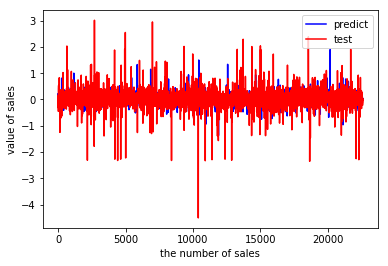

RMSE by hand: 3.59167719431
8.62035200474
0.0285793457134
0.04704


In [68]:
#Use Random Forest 

#1.取消heatingorsystemtypeid

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


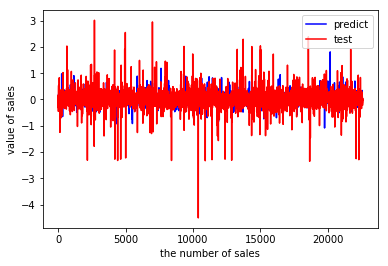

RMSE by hand: 3.57006883951
8.50760175403
0.0282365003297
0.0463


In [69]:
#Use Random Forest 

#1.取消finishedsquarefeet12

import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


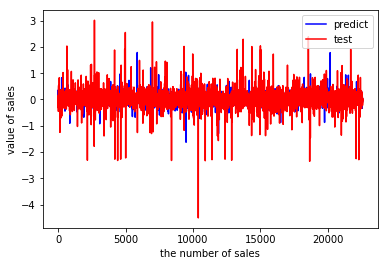

RMSE by hand: 3.59582126579
8.55433274757
0.0286453333677
0.04669


In [70]:
#Use Random Forest 

#3.取消calculatedfinishedsquarefeet
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','finishedsquarefeet12','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


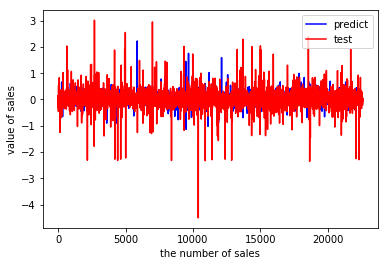

RMSE by hand: 3.58951359293
8.49672422262
0.0285449240858
0.04618


In [71]:
#Use Random Forest 

#4.取消calculatedbathnbr
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


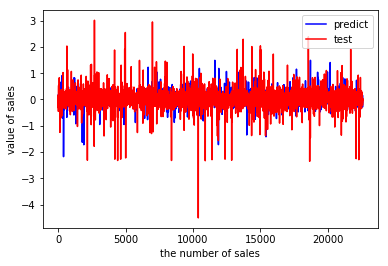

RMSE by hand: 3.70600794028
8.80504931345
0.0304277877916
0.0471191666667


In [72]:
#Use Random Forest 

#5.取消structuretaxvaluedollarcnt
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','bedroomcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


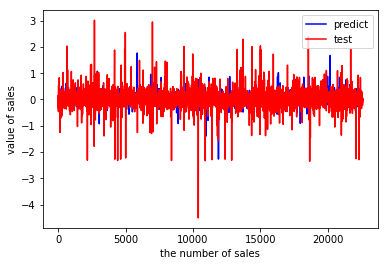

RMSE by hand: 3.59540936625
8.58490755814
0.0286387711262
0.04681


In [73]:
#Use Random Forest 

#6.取消bedroomcnt
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bathroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


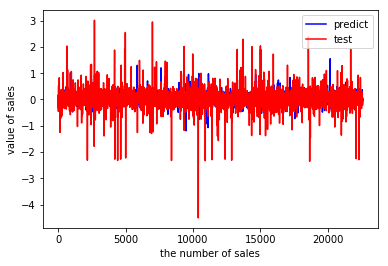

RMSE by hand: 3.5671617761
8.51709621398
0.0281905337784
0.04674


In [74]:
#Use Random Forest 

#7.取消bathroomcnt
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','fullbathcnt']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


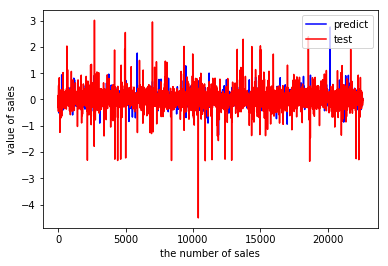

RMSE by hand: 3.60147280031
8.51885191967
0.028735447586
0.04662


In [75]:
#Use Random Forest 

#8.取消fullbathcnt
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt',]
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


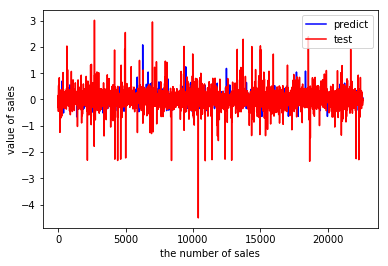

RMSE by hand: 3.44668314442
7.95736097138
0.0263184560636
0.0423624671717


In [76]:
#结论:需要取消calculatedfinishedsquarefeet，calculatedbathnbr，structuretaxvaluedollarcnt，bedroomcnt，bathroomcnt，fullbathcnt
#Use Random Forest 


import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv('midterm_2016.csv')
df.index = df['parcelid'].tolist()

column=['heatingorsystemtypeid','finishedsquarefeet12']
X = df[column]
#X =array[:,1]
Y = df['logerror']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  random_state=1)


#print (Y_test.head(2))
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model=regressor.fit(X_train, Y_train)
print(model)
from sklearn.metrics import accuracy_score
Y_pred = regressor.predict(X_test)
#print(accuracy_score(Y_test, Y_pred))


# make ROC graph
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

# use RMES
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print("RMSE by hand:",sum_erro)


#R-squared score of this model
train_pred=regressor.predict(X_train)
from sklearn.metrics import*
r2_score(Y_train,train_pred)
#Mean absolute percentage error (MAPE)
print(mean_absolute_error(Y_test,Y_pred)*100)
#Mean squared error
print(mean_squared_error(Y_test,Y_pred))
#Median absolute error
print(median_absolute_error(Y_test,Y_pred))

In [77]:
# Use Neural networks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# load pima indians dataset
df =  pd.read_csv("midterm_2016.csv")
# split into input (X) and output (Y) variables
column=['heatingorsystemtypeid','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt']
X = np.array(df[column])
Y = np.array(df[['logerror']])

neural_net = MLPRegressor(
    activation='logistic',
    learning_rate_init=0.001,
    solver='sgd',
    learning_rate='invscaling',
    hidden_layer_sizes=(200,),
    verbose=True,
    max_iter=2000,
    tol=1e-6
)

# Scaling the data
max_min_scaler = preprocessing.MinMaxScaler()
X_scaled = max_min_scaler.fit_transform(X)
Y_scaled = max_min_scaler.fit_transform(Y)

neural_net.fit(X_scaled[0:4001], Y_scaled[0:4001].ravel())

predicted = neural_net.predict(X_scaled[5001:5051])

# Scale back to actual scale
max_min_scaler = preprocessing.MinMaxScaler(feature_range=(Y[5001:5051].min(), Y[5001:5051].max()))
predicted_scaled = max_min_scaler.fit_transform(predicted.reshape(-1, 1))

print("Root Mean Square Error ", mean_squared_error(Y[5001:5051], predicted_scaled))


Iteration 1, loss = 0.04041079
Iteration 2, loss = 0.01019061
Iteration 3, loss = 0.02102910
Iteration 4, loss = 0.01856962
Iteration 5, loss = 0.01536955
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.
Root Mean Square Error  0.212767050844
